# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | kourou
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | loango
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hernando
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | zhanaozen
Processing Record 16 of Set 1 | ialibu
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | zheleznogorsk-ilimskiy
Processing Record 19 of Set 1 | singkawang
Processing Record 20 of Set 1 | tajerouine
Processing Record 21 of Set 1 | mhamid
Processing Record 22 o

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,25.77,82,52,4.34,RE,1710296680
1,waitangi,-43.9535,-176.5597,16.01,80,100,3.58,NZ,1710296681
2,nemuro,43.3236,145.5750,-3.44,74,100,18.05,JP,1710296681
3,kourou,5.1552,-52.6478,28.03,89,100,4.01,GF,1710296682
4,albany,42.6001,-73.9662,8.23,56,1,2.28,US,1710296004


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,25.77,82,52,4.34,RE,1710296680
1,waitangi,-43.9535,-176.5597,16.01,80,100,3.58,NZ,1710296681
2,nemuro,43.3236,145.5750,-3.44,74,100,18.05,JP,1710296681
3,kourou,5.1552,-52.6478,28.03,89,100,4.01,GF,1710296682
4,albany,42.6001,-73.9662,8.23,56,1,2.28,US,1710296004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

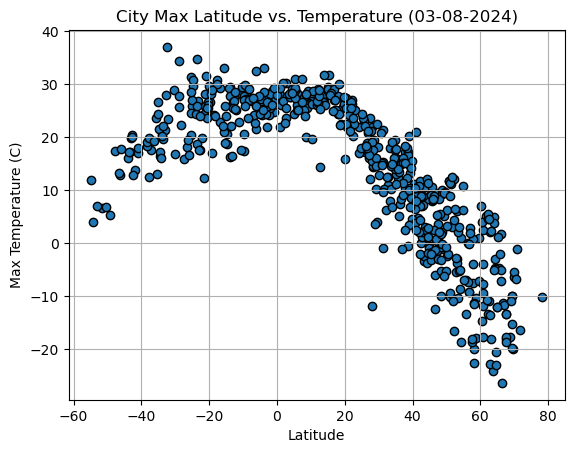

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

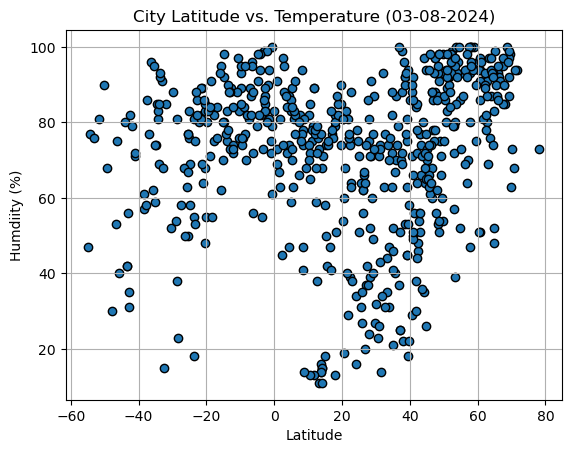

In [15]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humdiity (%)')
plt.title('City Latitude vs. Temperature (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

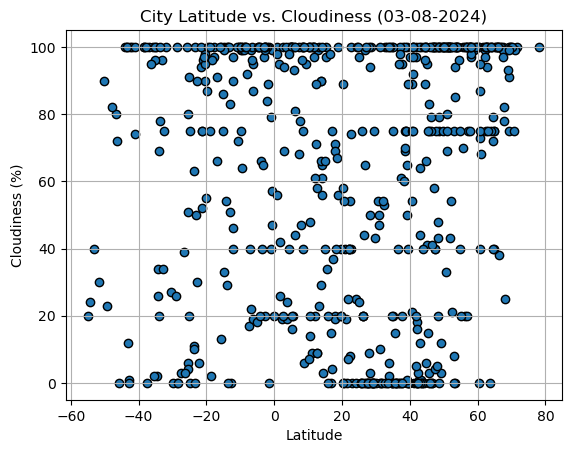

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

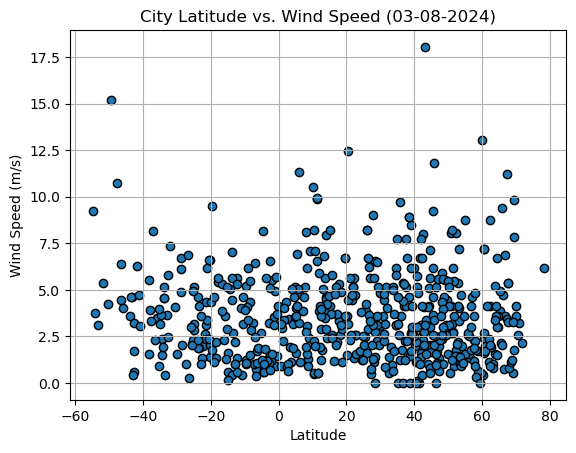

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (03-08-2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    plt.scatter(x, y)
    plt.plot(x, line, color='red')

#linear_regression_plot(x,y)

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nemuro,43.3236,145.5750,-3.44,74,100,18.05,JP,1710296681
3,kourou,5.1552,-52.6478,28.03,89,100,4.01,GF,1710296682
4,albany,42.6001,-73.9662,8.23,56,1,2.28,US,1710296004
11,hernando,28.5419,-82.4582,19.47,91,0,0.00,US,1710296687
13,zhanaozen,43.3000,52.8000,-2.41,66,1,2.92,KZ,1710296688


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,25.77,82,52,4.34,RE,1710296680
1,waitangi,-43.9535,-176.5597,16.01,80,100,3.58,NZ,1710296681
5,loango,-4.6719,11.8312,26.86,91,100,0.60,CG,1710296683
6,port-aux-francais,-49.3500,70.2167,5.23,68,23,15.19,TF,1710296684
7,invercargill,-46.4000,168.3500,12.79,75,72,4.47,NZ,1710296684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8039144052631542


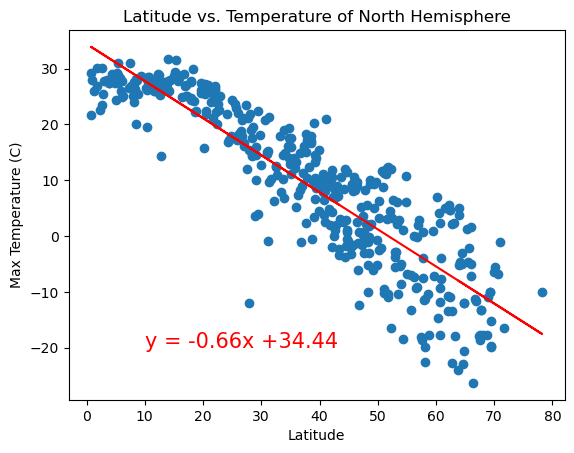

In [68]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Temperature of North Hemisphere")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.40212135577536146


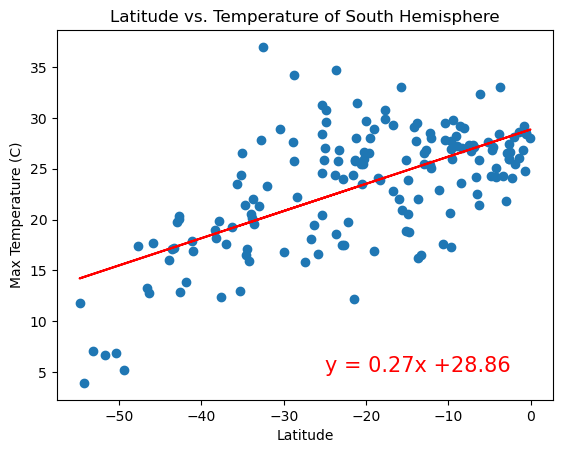

In [70]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude vs. Temperature of South Hemisphere")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression plots show a positive relationship between the latitude and temp for north and a negative relationship for the south. As you get closer to the equator, the temperature rises which makes sense since the North and South Pole are some of the coldest places on the planet.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11790237521126712


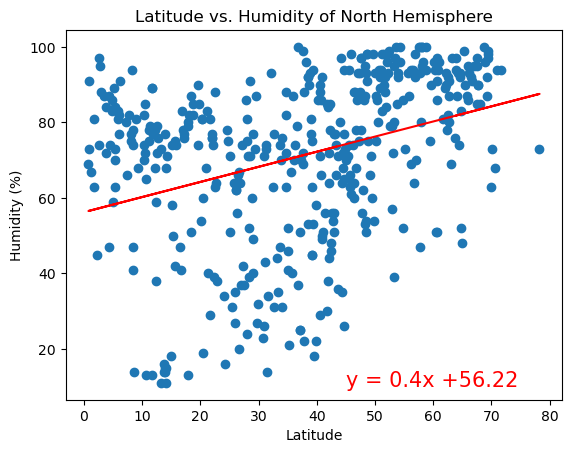

In [71]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.18048530331576754


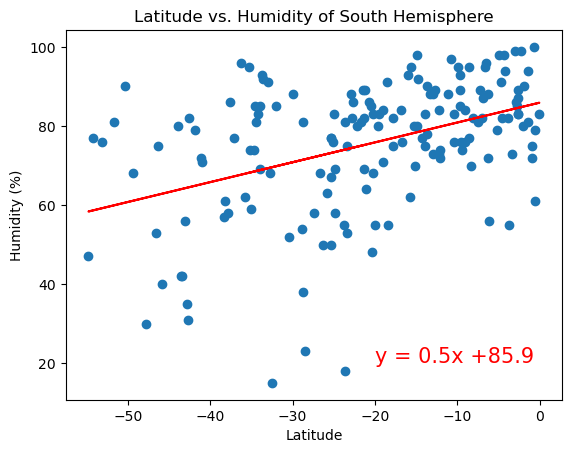

In [73]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity of South Hemisphere")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression shows a positive relationship for the humidity and lattitude (near the poles). This is more apparent in the North Hemisphere data (greater slope). This is because saturation vapor pressure is low.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0499912650524044


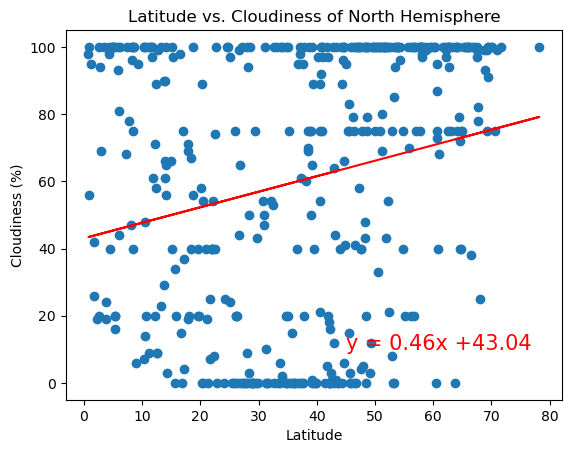

In [74]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.03681736105781067


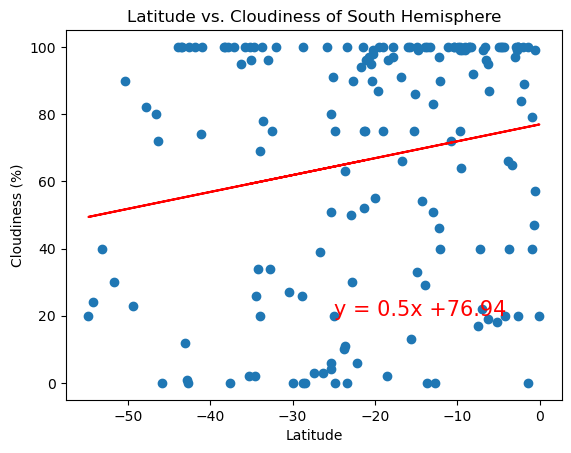

In [75]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness of South Hemisphere")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear regression also shows a positive relationship between cloudiness and lattitude possibly due to the reflection of sunlight off water which in turn can lead to the creation of more clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004532725985530182


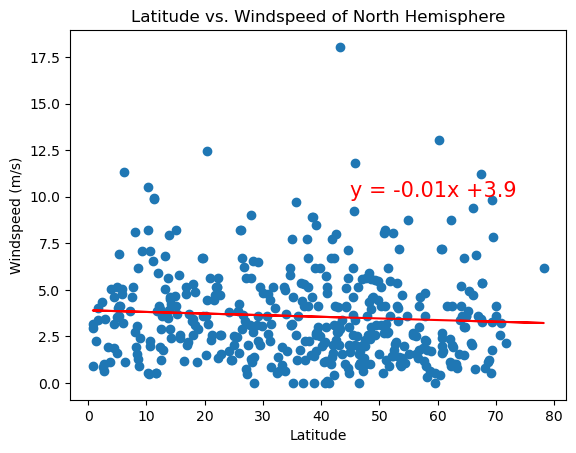

In [76]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_north = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.title("Latitude vs. Windspeed of North Hemisphere")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

The r-value is: 0.07559096523956589


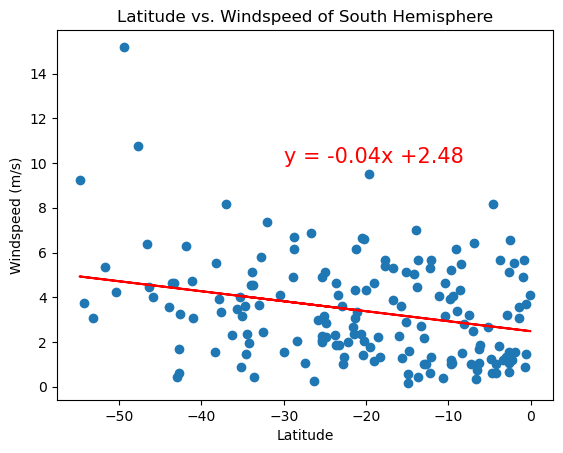

In [77]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values_south = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

linear_regression_plot(x, y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.title("Latitude vs. Windspeed of South Hemisphere")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** The linear relationship is negative for the wind speed and latitude meaning that it tends to decrease around the poles. This could be influenced by the global wind patterns, atmospheric circulation, and the Earth's rotation.